In [95]:
import tensorflow as tf
import matplotlib as mp
%matplotlib inline
import tensorflow.contrib.slim as slim
import os
import sys
sys.path.append('..')
import tools as tools
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy
from scipy import ndimage, misc
from scipy.misc import imshow
import skimage
GPU='0'

In [96]:
tf.reset_default_graph()

In [97]:
def load_real_rgbs(test_mv=5):
    obj_rgbs_folder ='./Data_sample/amazon_real_rgbs/airfilter/'
    rgbs = []
    rgbs_views = sorted(os.listdir(obj_rgbs_folder))
    for v in rgbs_views:
        if not v.endswith('png'): continue
      
        rgbs.append(tools.Data.load_single_X_rgb_r2n2(obj_rgbs_folder + v, train=False))
    
    rgbs = np.asarray(rgbs)
    x_sample = rgbs[0:test_mv, :, :, :].reshape(1, test_mv, 127, 127, 3)
    return x_sample, None

In [98]:
def load_shapenet_rgbs(test_mv=8):
    obj_rgbs_folder = './Data_sample/ShapeNetRendering/03001627/1a6f615e8b1b5ae4dbbc9440457e303e/rendering/'
    obj_gt_vox_path ='./Data_sample/ShapeNetVox32/03001627/1a6f615e8b1b5ae4dbbc9440457e303e/model.binvox'
    rgbs=[]
    rgbs_views = sorted(os.listdir(obj_rgbs_folder))
    for v in rgbs_views:
        if not v.endswith('png'): continue
        rgbs.append(tools.Data.load_single_X_rgb_r2n2(obj_rgbs_folder + v, train=False))
    rgbs = np.asarray(rgbs)
    x_sample = rgbs[0:test_mv, :, :, :].reshape(1, test_mv, 127, 127, 3)
    y_true = tools.Data.load_single_Y_vox(obj_gt_vox_path)
    return x_sample, y_true

In [99]:
def ttest_demo():
    model_path = './Model_released/'
    if not os.path.isfile(model_path + 'model.cptk.data-00000-of-00001'):
        print ('please download our released model first!')
        return

    config = tf.ConfigProto(allow_soft_placement=True)
    config.gpu_options.visible_device_list = GPU
    

    
    with tf.Session(config=config) as sess:
        saver = tf.train.import_meta_graph(model_path + 'model.cptk.meta', clear_devices=True)
        saver.restore(sess, model_path + 'model.cptk')
        print ('model restored!')      
        
       # graph = tf.get_default_graph()
       # print(graph.get_operations())
        
        X = tf.get_default_graph().get_tensor_by_name("Placeholder:0")
        Y_pred = tf.get_default_graph().get_tensor_by_name("r2n/Reshape_9:0")
        
#         plot_data = tf.get_default_graph().get_tensor_by_name("r2n/Reshape_7:0") #############(1,1024)
        plot_data = tf.get_default_graph().get_tensor_by_name("r2n/Reshape_8:0") #############(1,1024)


        
        print("X: ", X.shape)        #Tensor("Placeholder:0", shape=(?, ?, 127, 127, 3), dtype=float32)
#       print(Y_pred)   #Tensor("r2n/Reshape_9:0", shape=(?, 32, 32, 32), dtype=float32)
    
       #x_sample, gt_vox = load_shapenet_rgbs()    
        x_sample, gt_vox = load_real_rgbs()
        print("x_sample: ", x_sample.shape)  
        print("x_sample_data: ", type(x_sample[:,:,:,:,1]))  

        
        print("loading compleated")
        
        #tf.global_variables_initializer()
        
        
        #print(y_pred.shape)    ###############################(1, 32, 32, 32) ##############################

        print("plot_data ", plot_data.shape)
        plot_buf= tf.reshape(plot_data, [-1, 32, 32, 1])
        print("plot_buf ", plot_buf.shape)

        summary_op = tf.summary.image("plot image", plot_buf)

    #     with tf.Session() as sess:
        # Run
        y_pred,c_summary  = sess.run([Y_pred,summary_op], feed_dict={X: x_sample})

         
        # Write summary  tf.summary.FileWriter
        writer = tf.summary.FileWriter('./logs')
        writer.add_summary(c_summary)
        writer.close()
    #    sys.exit(). sys.exit() 
        ###### to visualize
        th = 0.25
        y_pred[y_pred>=th]=1
        y_pred[y_pred<th]=0
        tools.Data.plotFromVoxels(np.reshape(y_pred,[32,32,32]), title='y_pred')
        if gt_vox is not None:
            tools.Data.plotFromVoxels(np.reshape(gt_vox,[32,32,32]), title='y_true')
        from matplotlib.pyplot import show
        show()

In [94]:
!tensorboard --logdir=logs/

TensorBoard 1.11.0 at http://wipro-ThinkCentre:6006 (Press CTRL+C to quit)
^C


In [66]:
!pwd

/home/wiproec4/3d reconstruction/attsets


enterd
INFO:tensorflow:Restoring parameters from ./Model_released/model.cptk
model restored!
X:  (?, ?, 127, 127, 3)
load_single_X_rgb_r2n2
processing_img
add_random_color_background
(127, 127, 3)
crop_center
load_single_X_rgb_r2n2
processing_img
add_random_color_background
(127, 127, 3)
crop_center
load_single_X_rgb_r2n2
processing_img
add_random_color_background
(127, 127, 3)
crop_center
load_single_X_rgb_r2n2
processing_img
add_random_color_background
(127, 127, 3)
crop_center
load_single_X_rgb_r2n2
processing_img
add_random_color_background
(127, 127, 3)
crop_center
load_single_X_rgb_r2n2
processing_img
add_random_color_background
(127, 127, 3)
crop_center
load_single_X_rgb_r2n2
processing_img
add_random_color_background
(127, 127, 3)
crop_center
load_single_X_rgb_r2n2
processing_img
add_random_color_background
(127, 127, 3)
crop_center
x_sample:  (1, 5, 127, 127, 3)
x_sample_data:  <class 'numpy.ndarray'>
loading compleated
plot_data  (?, 4, 4, 4, 128)
plot_buf  (?, 32, 32, 1)
INF

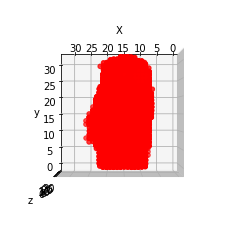

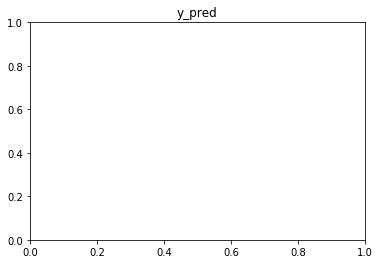

In [100]:
# if __name__ == '__main__':
	 
print ('enterd')    
ttest_demo()

In [ ]:
%tb
